# Station Description

As shown in the figure below, the data generated by the simulation includes a total of four stations (four pumping stations, one of which is a sub-transport station) and three valve chambers.

![Figure 1 Pump Station](../DOC/Figure1PumpStation.jpg)


Input Data are:

| Pump Station |  Inbound Flow | Outbound Flow |  | Outbound Temperature |
| :----:|  :----:  |  :----:  |  :----:  |  :----:  |
| Station A | -------- | Outbound Flow | Inbound Temperature | Outbound Temperature |  
| Station B | -------- | Outbound Flow | Inbound Temperature | Outbound Temperature |  
| Valve Chamber 1 | -------- | -------- | Inbound Temperature | -------- |  
| Valve Chamber 2 | -------- | -------- | Inbound Temperature | -------- |  
| Station C | Inbound Flow | Outbound Flow | Inbound Temperature | Outbound Temperature |  
| Valve Chamber 3 | -------- | -------- | Inbound Temperature | -------- |  
| Station D | Inbound Flow | -------- | Inbound Temperature | -------- |  


Predict Data are：

| Station |  Inbound Pressure | Outbound Pressure |
| :----:|  :----:  |  :----:  |
| Station A | Inbound Pressure | Outbound Pressure | 
| Station B | Inbound Pressure | Outbound Pressure |  
| Valve Chamber1 | Inbound Pressure | Outbound Pressure |  
| Valve Chamber2 | Inbound Pressure | Outbound Pressure | 
| Station C | Inbound Pressure | Outbound Pressure |  
| Valve Chamber3 | Inbound Pressure | Outbound Pressure |
| Station D | Inbound Pressure | -------- |

# Prepare data

In [2]:
#coding:utf-8
import torch
from torch import nn

import os
import time
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats, linalg

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False     

DATA_ROOT = "../DATA/"
xls_lists = os.listdir('../DATA/')

In [3]:
# 读取数据
# df_data = pd.read_excel('../DATA/TEST_DATA.xlsx', index_col='index')
df_data = pd.read_excel('../DATA/DATA2Git.xlsx', index_col='index')
df_describe = pd.read_excel('../DATA/regularization table.xlsx', index_col='Unnamed: 0')

## Data View

In [4]:
df_data

,Station A Outbound Flow,Station B Outbound Flow,Station C Inbound Flow,Station C Outbound Flow,Station D Inbound Flow,Station A Inbound Temperature,Station A Outbound Temperature,Station B Inbound Temperature,Station B Outbound Temperature,Valve Chamber1 Inbound Temperature,...,Valve Chamber1 Outbound Pressure,Valve Chamber2 Inbound Pressure,Valve Chamber2 Outbound Pressure,Station C Inbound Pressure,Station C after distribution Pressure,Station C before distribution Pressure,Station C Outbound Pressure,Valve Chamber3 Inbound Pressure,Valve Chamber3 Outbound Pressure,Station D Inbound Pressure
index,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,22.824000,24.604,22.513,23.114000,20.534000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,23.031000,24.542,22.348,23.010000,20.535000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000000,22.451000,24.604,22.431,23.072000,20.533000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,22.555000,24.625,22.451,23.072000,20.517000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,22.099000,24.148,22.099,22.803000,20.538000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1146.765969,1096.362999,1072.798987,610.453004,605.012982,13.736000,15.531,15.304,14.973999,16.320001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,1146.831033,1109.141033,1084.870016,648.106982,645.227019,19.307000,21.561,20.692,20.526000,20.866999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,1147.794005,1133.797001,1125.385030,664.159974,655.359996,19.287000,21.313,20.671,20.340000,20.744000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_describe

,Station A Outbound Flow,Station B Outbound Flow,Station C Inbound Flow,Station C Outbound Flow,Station D Inbound Flow,Station A Inbound Temperature,Station A Outbound Temperature,Station B Inbound Temperature,Station B Outbound Temperature,Valve Chamber1 Inbound Temperature,...,Valve Chamber1 Outbound Pressure,Valve Chamber2 Inbound Pressure,Valve Chamber2 Outbound Pressure,Station C Inbound Pressure,Station C after distribution Pressure,Station C before distribution Pressure,Station C Outbound Pressure,Valve Chamber3 Inbound Pressure,Valve Chamber3 Outbound Pressure,Station D Inbound Pressure
min,-5.381,-1.657,-4.161,0.000,0.00,5.928,5.435,7.204,0.000,-12.485,...,-0.078,-0.072,-0.081,0.182,-0.022,0.006,0.947,0.643,0.648,-0.034
max,1192.868,1157.297,1414.193,982.187,1103.68,26.694,27.212,24.066,23.755,21.136,...,0.874,0.888,0.868,1.316,0.283,1.300,4.764,4.013,4.026,1.192


## Numerical normalization

In [6]:
# Bulid label columns

TRAIN_FEATURE_LIST = ['Station A Outbound Flow',
                     'Station B Outbound Flow',
                     'Station C Inbound Flow',
                     'Station C Outbound Flow',
                     'Station D Inbound Flow',

                     'Station A Inbound Temperature',
                     'Station A Outbound Temperature',
                     'Station B Inbound Temperature',
                     'Station B Outbound Temperature',
                     'Valve Chamber1 Inbound Temperature',
                     'Valve Chamber2 Inbound Temperature',
                     'Station C Inbound Temperature',
                     'Station C Outbound Temperature',
                     'Valve Chamber3 Inbound Temperature',
                     'Station D Inbound Temperature']

LABEL_FEATURE_LIST = ['Station A Inbound Pressure',
                      'Station A Outbound Pressure',
                      'Station B Inbound Pressure',
                      'Station B Outbound Pressure',

                      'Valve Chamber1 Inbound Pressure',
                      'Valve Chamber1 Outbound Pressure',

                      'Valve Chamber2 Inbound Pressure',
                      'Valve Chamber2 Outbound Pressure',

                      'Station C Inbound Pressure',
                      'Station C after distribution Pressure',

                      'Station C before distribution Pressure',
                      'Station C Outbound Pressure',

                      'Valve Chamber3 Inbound Pressure',
                      'Valve Chamber3 Outbound Pressure',

                      'Station D Inbound Pressure']

ALL_FEATURE_LIST = TRAIN_FEATURE_LIST + LABEL_FEATURE_LIST

In [7]:
# Normalize the input value
df_data_input = (df_data[TRAIN_FEATURE_LIST] - df_describe[TRAIN_FEATURE_LIST].min()) / (df_describe[TRAIN_FEATURE_LIST].max() - df_describe[TRAIN_FEATURE_LIST].min())

# Prepare the model

In [8]:
# GAN Model

""" Discriminator Model
class Discriminator(torch.nn.Module):
    
    def __init__(self):
        super(Discriminator,self).__init__()
        self.conv = torch.nn.Sequential( nn.Linear(30, 15),
                                         nn.BatchNorm1d(num_features=15, momentum=0.8),
                                         nn.LeakyReLU(0.2, inplace=True),
                                         nn.Linear(15, 10),
                                         nn.BatchNorm1d(num_features=10, momentum=0.8),
                                         nn.LeakyReLU(0.2, inplace=True),
                                         nn.Linear(10, 1),
                                         nn.Sigmoid(),
                                        )
        
    def forward(self, input):
        output = self.conv(input)
        return output
"""


""" Generator Model """
class Generator(torch.nn.Module):

    def __init__(self):
        super(Generator,self).__init__()
        self.encoder  =  nn.Sequential(  nn.Linear(15, 10),
                                         nn.BatchNorm1d(num_features=10, momentum=0.8),
                                         nn.Tanh(),
                                         nn.Linear(10, 7),
                                         nn.BatchNorm1d(num_features=7, momentum=0.8),
                                         nn.Tanh() 
                                      )

        self.decoder = nn.Sequential( nn.Linear(7, 10),
                                      nn.BatchNorm1d(num_features=10, momentum=0.8),
                                      nn.Tanh(),
                                      nn.Linear(10, 15),
                                      nn.Tanh()
                                    )
        
    def forward(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded
    
def initialize_weights(m):
    """ Initialize model parameters  """
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight.data)

        
# 创建模型
# model_discriminator = Discriminator()
# model_discriminator.apply(initialize_weights)

model_generator = Generator()
# model_generator.apply(initialize_weights)
model_generator.load_state_dict(torch.load( '../MODEL/gen_best_model0.2761.pth' ))

<All keys matched successfully>

# Generate data and save

In [9]:
# Generate data and save
input_data = torch.tensor(df_data_input.values).to(torch.float32)
X_gen = model_generator(input_data)

df_output = pd.concat([pd.DataFrame(input_data.data, columns=TRAIN_FEATURE_LIST), 
                       pd.DataFrame(X_gen.data, columns=LABEL_FEATURE_LIST)], axis=1)

df_output = (df_output * \
             (df_describe.loc['max', df_output.columns] - df_describe.loc['min', df_output.columns]) +\
             df_describe.loc['min', df_output.columns])  


df_output = pd.DataFrame(np.array(df_output.values, dtype=float), columns=df_output.columns)
df_output.to_excel('../DATA/OutputResult.xlsx')
print("Flow->Pressure Prediction results completed！")

Flow->Pressure Prediction results completed！


,Station A Outbound Flow,Station B Outbound Flow,Station C Inbound Flow,Station C Outbound Flow,Station D Inbound Flow,Station A Inbound Temperature,Station A Outbound Temperature,Station B Inbound Temperature,Station B Outbound Temperature,Valve Chamber1 Inbound Temperature,...,Valve Chamber1 Outbound Pressure,Valve Chamber2 Inbound Pressure,Valve Chamber2 Outbound Pressure,Station C Inbound Pressure,Station C after distribution Pressure,Station C before distribution Pressure,Station C Outbound Pressure,Valve Chamber3 Inbound Pressure,Valve Chamber3 Outbound Pressure,Station D Inbound Pressure
0,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.823999,24.604000,22.513000,23.113998,20.533997,...,0.020574,0.051783,0.111666,0.644013,0.110962,-0.061744,1.160374,1.524948,1.374285,0.441046
1,0.000000,1.192093e-07,0.000000,0.000000,0.000000,23.031000,24.542000,22.348000,23.009998,20.534996,...,0.008321,0.041714,0.105212,0.636763,0.113265,-0.061226,1.126383,1.470697,1.384587,0.424352
2,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.451000,24.604000,22.431000,23.071999,20.532997,...,0.011031,0.043943,0.106775,0.638420,0.112788,-0.061156,1.133477,1.482768,1.383196,0.428249
3,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.555000,24.625000,22.450998,23.071999,20.516998,...,0.012282,0.045047,0.107496,0.639203,0.112545,-0.061203,1.137129,1.488455,1.382208,0.430047
4,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.099001,24.147999,22.098999,22.802999,20.537998,...,-0.000457,0.033458,0.099434,0.630683,0.114708,-0.062349,1.100450,1.427603,1.386878,0.411191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1146.765991,1.096363e+03,1072.798950,610.453003,605.013000,13.736000,15.531000,15.304001,14.973999,16.320000,...,0.103279,0.170988,0.118304,0.572847,0.222095,0.600917,2.210258,1.848177,2.040608,0.068174
1819,1146.831055,1.109141e+03,1084.869995,648.106995,645.227051,19.307001,21.561001,20.691999,20.525999,20.866997,...,0.151724,0.171435,0.032390,0.484599,0.199215,0.636095,3.222644,2.473977,2.877717,0.266348
1820,1147.794067,1.133797e+03,1125.385010,664.159973,655.360046,19.287001,21.313000,20.671000,20.340000,20.743999,...,0.148271,0.164022,-0.014148,0.417235,0.196686,0.612113,3.274226,2.345343,2.916479,0.158409
1821,1180.667969,1.133797e+03,1064.194946,661.973022,656.000061,19.555000,21.334002,21.726999,22.098999,21.043999,...,0.169485,0.167995,0.023746,0.463825,0.197918,0.629161,3.242070,2.487351,2.879365,0.294782


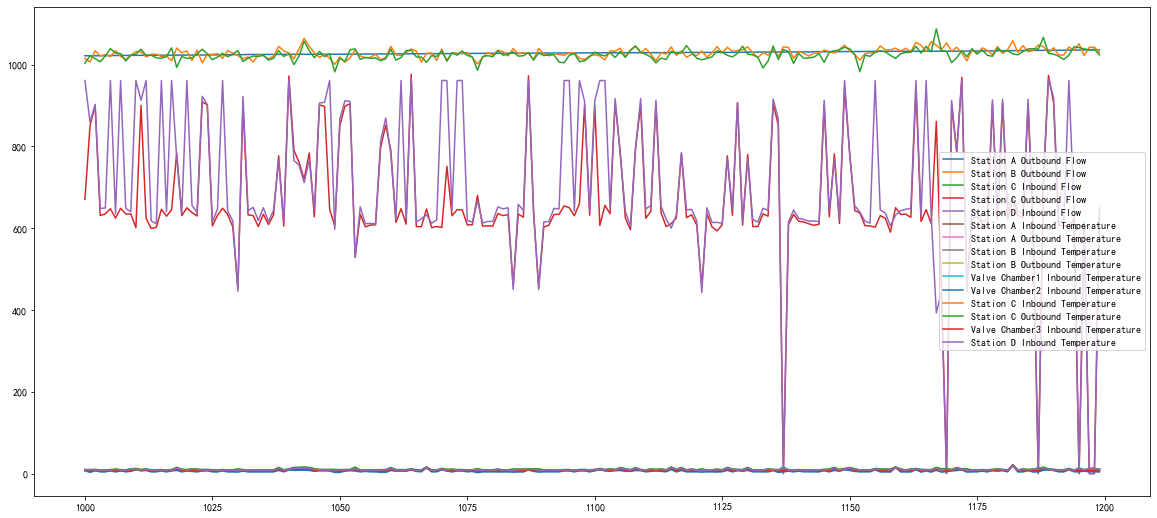

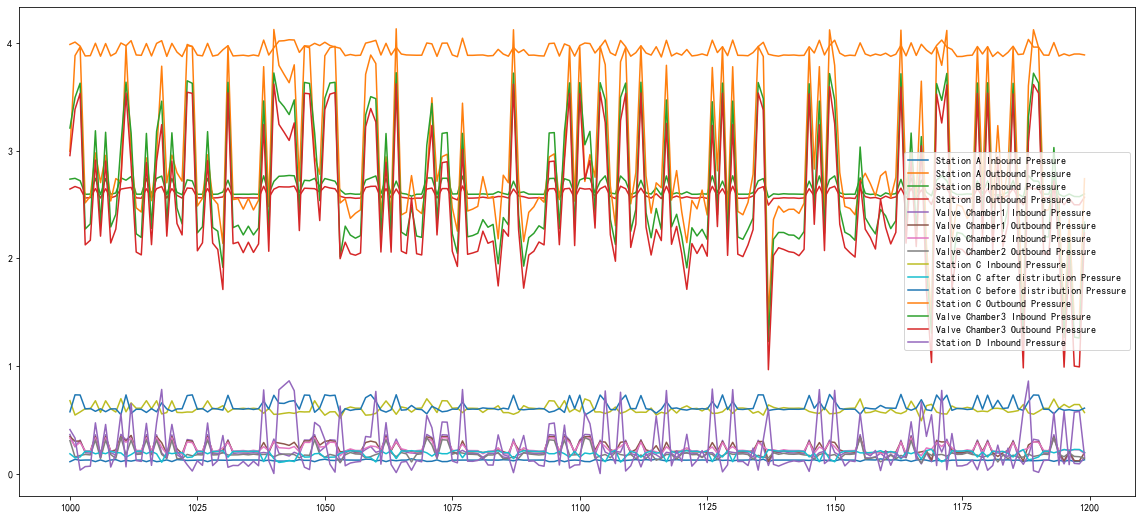

In [10]:
df_output[TRAIN_FEATURE_LIST][1000:1200].plot(figsize=(20,9))
df_output[LABEL_FEATURE_LIST][1000:1200].plot(figsize=(20,9))
df_output